# DQN analysis

In [2]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [3]:
path_1 = r"/home/docker/car_racing/models/QDQN_1"
path_2 = r"/home/docker/car_racing/models/QDQN_2"

In [4]:
file_1 = os.path.join(path_1, "2024-04-06 180644.545616_DQN_training_results.json")
file_2 = os.path.join(path_2, "2024-04-10 163153.420357_DQN_training_results.json")

with open(file_1, "r") as f:
    data_1 = json.load(f)
with open(file_2, "r") as f:
    data_2 = json.load(f)

In [5]:
def convert_data(data):
    return {key: ast.literal_eval(value) for key, value in data.items()}


In [6]:
data_1 = convert_data(data_1)
data_2 = convert_data(data_2)

In [7]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)

In [8]:
keep_cols = ['epsilon', 'time_frame_counter',
    'episode_reward', 'average_rewards', 'loss_evolution']

In [9]:
df1 = df1[keep_cols]
df2 = df2[keep_cols]

Params:
- DQN
- Hidden layers 256,
- learning rate 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- nqubits 4
- quantum architecture 1
- gas 4

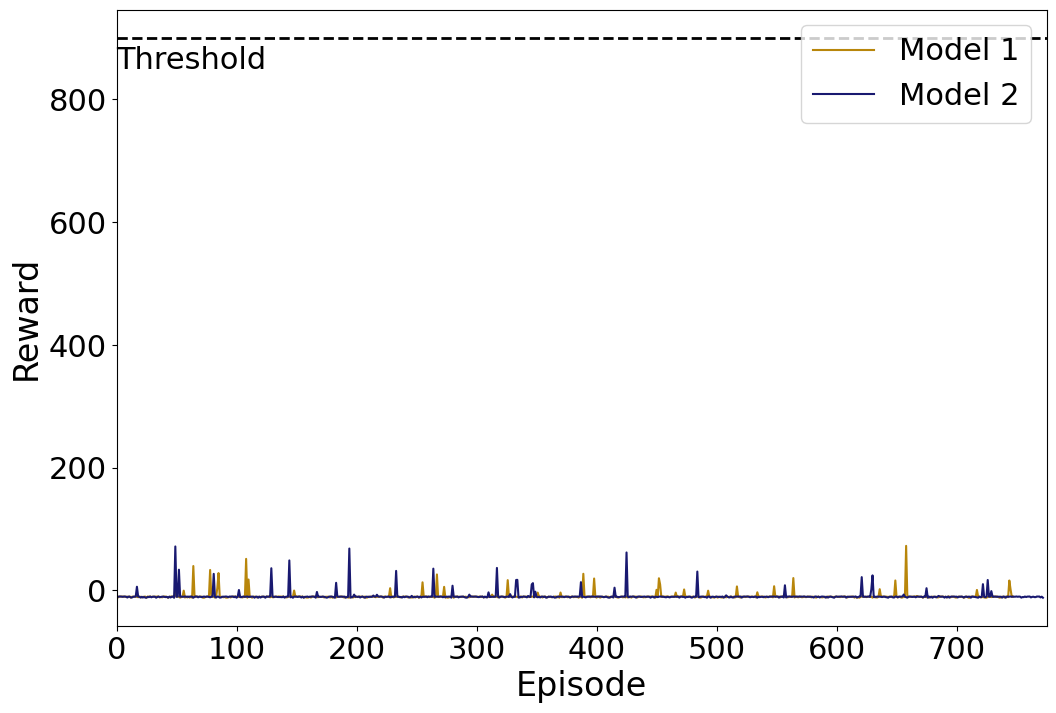

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(df1['episode_reward'], label='Model 1', color='darkgoldenrod', alpha=1.0)
plt.plot(df2['episode_reward'], label='Model 2', color='midnightblue', alpha=1.0)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 850, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 775)
plt.show()

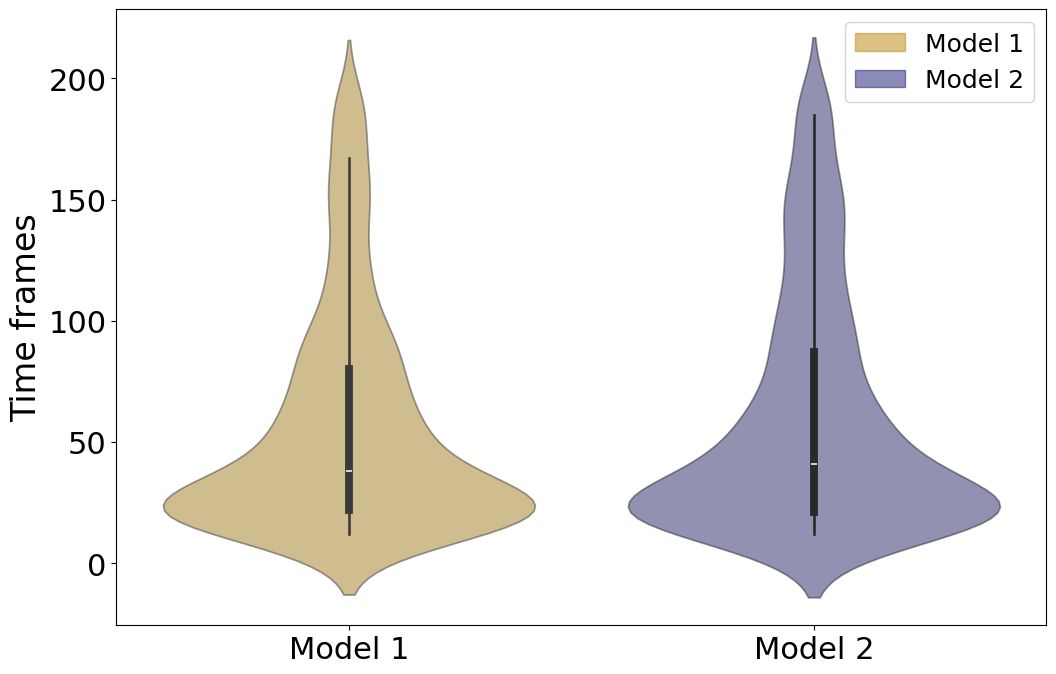

In [11]:
dataframes = [df1, df2]
colors = ['darkgoldenrod', 'midnightblue']
positions = np.arange(len(dataframes))
labels = ['Model 1', 'Model 2']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

# plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
# plt.ylim(-200, 1000)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

In [12]:
df1.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,0.261088,57.173797,-9.570792,-9.621039,1.100013
std,0.256655,46.689229,6.138410,0.618778,0.069601
min,0.023651,12.000000,-12.000000,-11.197719,0.865593
25%,0.060309,22.000000,-10.997093,-9.964831,1.060458
50%,0.153788,38.000000,-10.432037,-9.693225,1.095610
75%,0.392158,80.000000,-10.174091,-9.389470,1.134883
max,1.000000,191.000000,72.454545,-7.984529,1.439408


In [13]:
df2.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,773.000000,773.00000,773.000000,773.000000,773.000000
mean,0.253361,60.15912,-9.283332,-9.274394,1.073735
std,0.255983,49.13621,7.454793,0.649992,0.077007
min,0.020865,12.00000,-12.000000,-11.263754,0.782217
25%,0.054899,21.00000,-10.823529,-9.821362,1.032606
50%,0.144447,41.00000,-10.394366,-9.330169,1.080228
75%,0.380062,87.00000,-10.172474,-8.727344,1.120340
max,1.000000,191.00000,71.479452,-7.774060,1.401576


### Influence of quantum circuit architecture

Params:
- DQN
- Hidden layers 256,
- learning rate 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- quantum architectures 1, 2 and 3
- gas 4
- nqubits 4

In [14]:
path_3 = r"/home/docker/car_racing/models/QDQN_3"
path_4 = r"/home/docker/car_racing/models/QDQN_5"

In [15]:
file_4 = os.path.join(path_3, "2024-04-13 133900.102586_DQN_training_results.json")
file_5 = os.path.join(path_4, "2024-04-20 094626.046780_DQN_training_results.json")

with open(file_4, "r") as f:
    data_4 = json.load(f)
with open(file_5, "r") as f:
    data_5 = json.load(f)

In [16]:
data_4 = convert_data(data_4)
data_5 = convert_data(data_5)
df4 = pd.DataFrame(data_4)
df5 = pd.DataFrame(data_5)

In [17]:
df4 = df4[keep_cols]
df5 = df5[keep_cols]

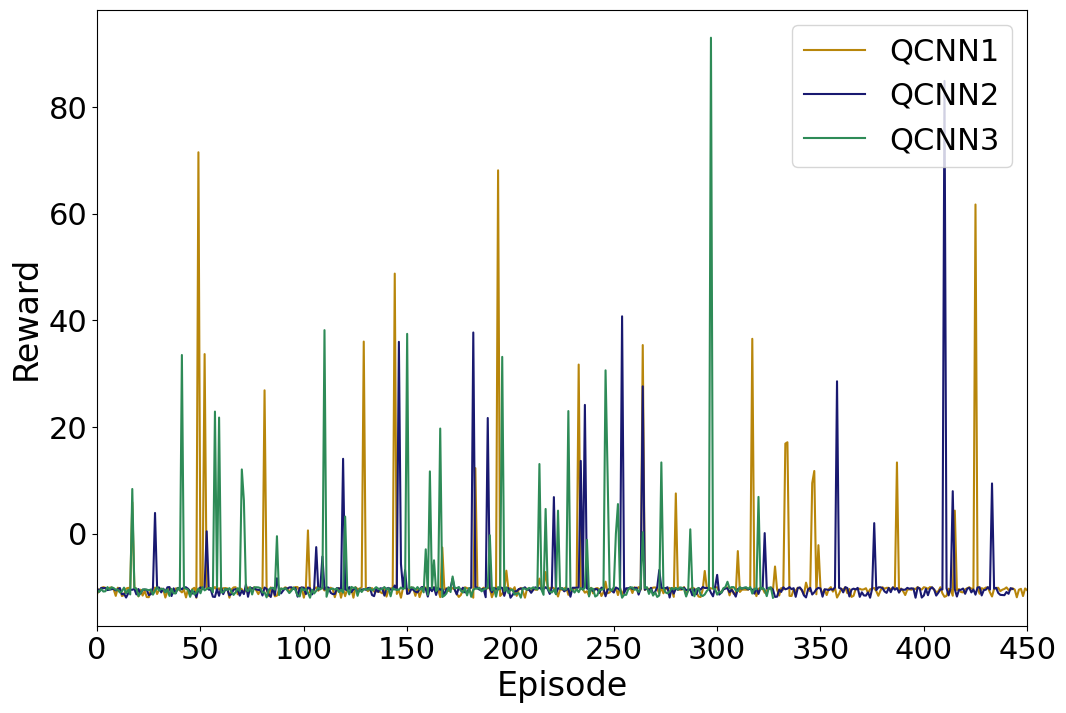

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(df2['episode_reward'], label='QCNN1', color='darkgoldenrod', alpha=1.0)
plt.plot(df4['episode_reward'], label='QCNN2', color='midnightblue', alpha=1.0)
plt.plot(df5['episode_reward'], label='QCNN3', color='seagreen', alpha=1.0)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
# plt.axhline(y=900, color='black', linestyle='--', lw=2)
# plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 450)

plt.show()

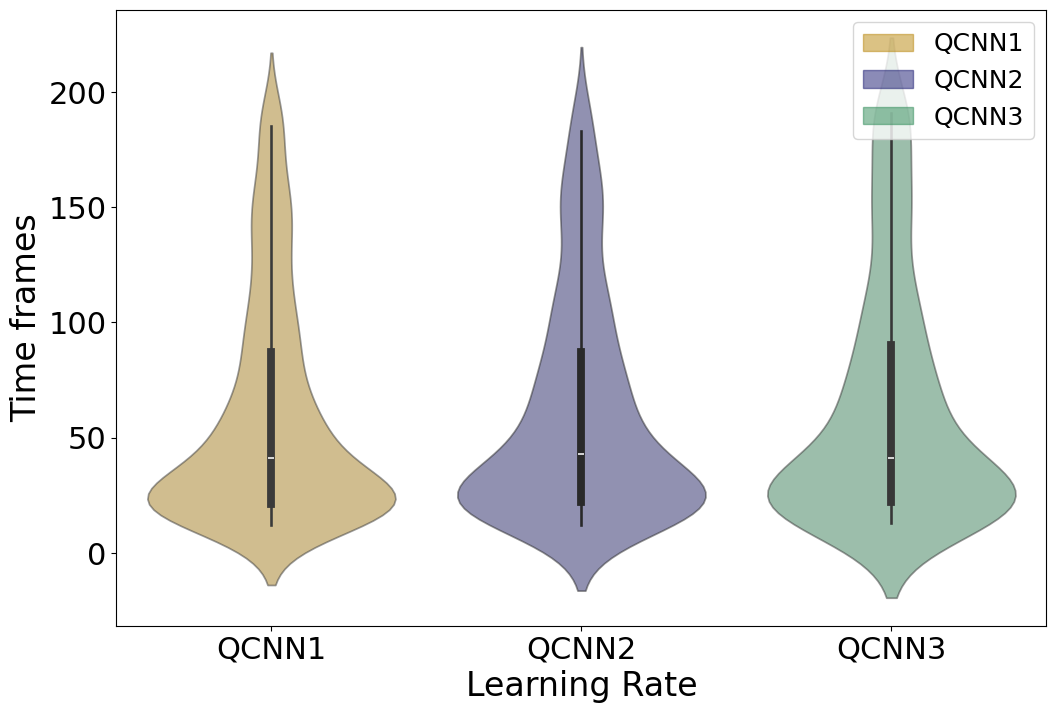

In [19]:
dataframes = [df2, df4, df5]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
positions = np.arange(len(dataframes))
labels = ['QCNN1', 'QCNN2', 'QCNN3']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
# plt.ylim(-200, 1000)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

In [20]:
df4.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.401799,61.358108,-9.316149,-9.514031,1.058875
std,0.248702,48.115879,7.346899,0.726857,0.068517
min,0.108549,12.000000,-12.000000,-10.707382,0.779547
25%,0.189112,22.000000,-10.935763,-10.203750,1.016513
50%,0.329468,43.000000,-10.394175,-9.606147,1.055126
75%,0.573994,87.000000,-10.159358,-8.874753,1.102450
max,1.000000,191.000000,84.851852,-8.002052,1.262236


In [21]:
df5.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.491961,62.823171,-8.286000,-8.554631,1.078749
std,0.228844,51.803373,9.371737,0.801439,0.062672
min,0.194154,13.000000,-12.000000,-10.730644,0.865092
25%,0.292490,22.000000,-10.887284,-8.809946,1.046477
50%,0.440631,41.000000,-10.411786,-8.440007,1.080076
75%,0.663801,90.000000,-10.151829,-7.939105,1.114694
max,1.000000,191.000000,92.950570,-7.276055,1.300875


# Influence of learning rate

Params:
- DQN
- Hidden layers 32,
- learning rate 0.01, 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- QCNN2
- nqubits 4
- gas 4

In [22]:
path_6 = r"/home/docker/car_racing/models/QDQN_4" # LR = 0.01

In [23]:
file_lr01 = os.path.join(path_6, "2024-04-21 09:10:57.971310_DQN_training_results.json")

with open(file_lr01, "r") as f:
    data_lr01 = json.load(f)

In [24]:
data_lr01 = convert_data(data_lr01)
df_lr01 = pd.DataFrame(data_lr01)

In [25]:
df_lr01 = df_lr01[keep_cols]

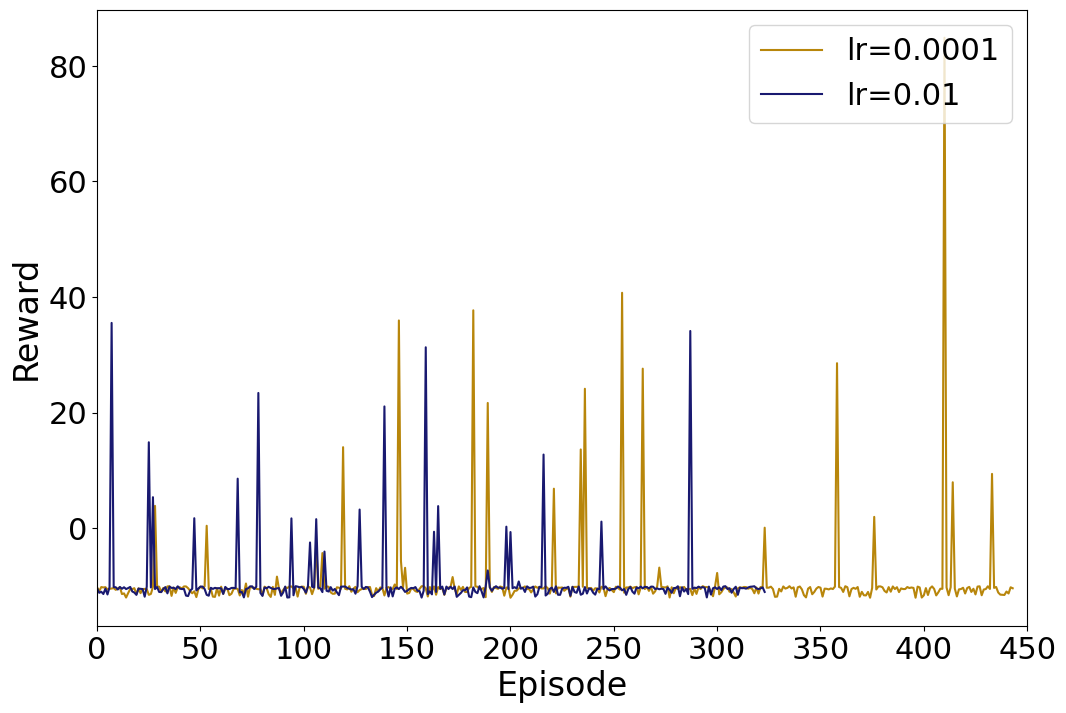

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(df4['episode_reward'], label='lr=0.0001', color='darkgoldenrod', alpha=1.0)
plt.plot(df_lr01['episode_reward'], label='lr=0.01', color='midnightblue', alpha=1.0)

plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
# plt.axhline(y=900, color='black', linestyle='--', lw=2)
# plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 450)

plt.show()

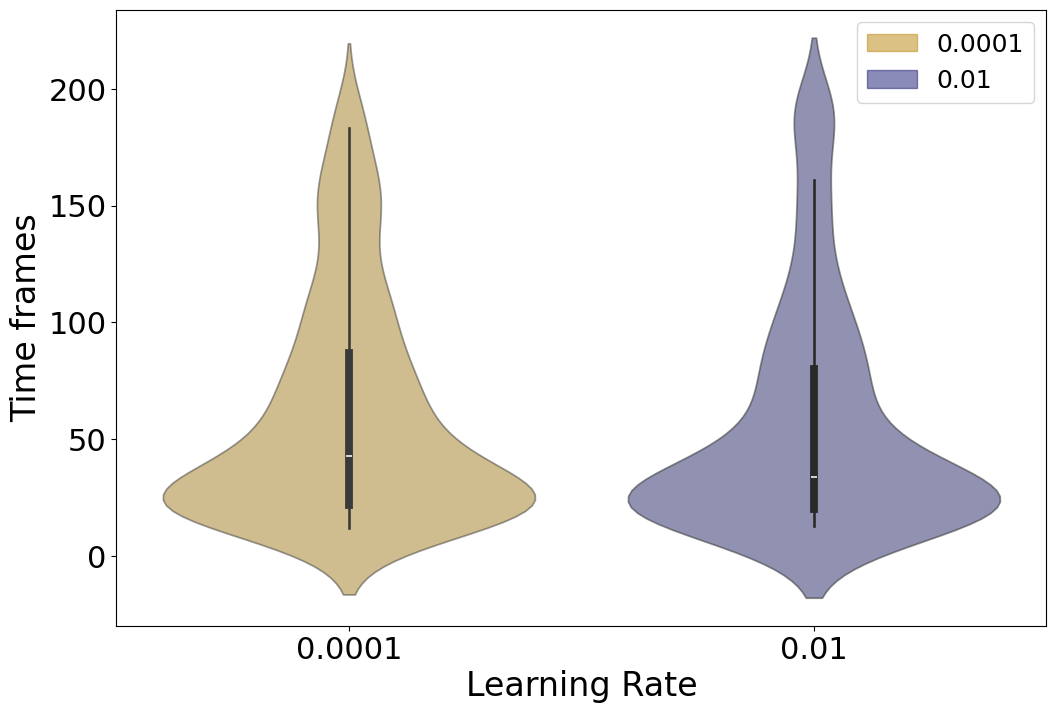

In [27]:
dataframes = [df4, df_lr01]
colors = ['darkgoldenrod', 'midnightblue']
positions = np.arange(len(dataframes))
labels = ['0.0001', '0.01']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
# plt.ylim(-200, 1000)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

In [28]:
df4.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.401799,61.358108,-9.316149,-9.514031,1.058875
std,0.248702,48.115879,7.346899,0.726857,0.068517
min,0.108549,12.000000,-12.000000,-10.707382,0.779547
25%,0.189112,22.000000,-10.935763,-10.203750,1.016513
50%,0.329468,43.000000,-10.394175,-9.606147,1.055126
75%,0.573994,87.000000,-10.159358,-8.874753,1.102450
max,1.000000,191.000000,84.851852,-8.002052,1.262236


In [29]:
df_lr01.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,324.000000,324.000000,324.000000,324.000000,324.000000
mean,0.495620,56.632716,-9.345526,-9.134118,1.059689
std,0.227853,49.016497,5.801567,0.698816,0.078913
min,0.198087,13.000000,-11.974359,-10.965741,0.862851
25%,0.296922,20.000000,-10.921992,-9.423734,1.016717
50%,0.445071,34.000000,-10.406285,-9.157615,1.049506
75%,0.667137,80.000000,-10.159953,-8.866199,1.090231
max,1.000000,191.000000,35.528986,-5.044682,1.579681


# Influence of quantum circuit depth

Params:
- DQN
- Hidden layers 64,
- learning rate 0.01, 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- QCNN2
- nqubits 4
- gas 4

In [30]:
path_7 = r"/home/docker/car_racing/models/QDQN_6" # layers 64

In [31]:
file_layers64 = os.path.join(path_7, "2024-04-26 15:35:01.612891_DQN_training_results.json")

with open(file_layers64, "r") as f:
    data_layers64 = json.load(f)

In [32]:
data_layers64 = convert_data(data_layers64)
df_layers64 = pd.DataFrame(data_layers64)

In [33]:
df_layers64 = df_layers64[keep_cols]

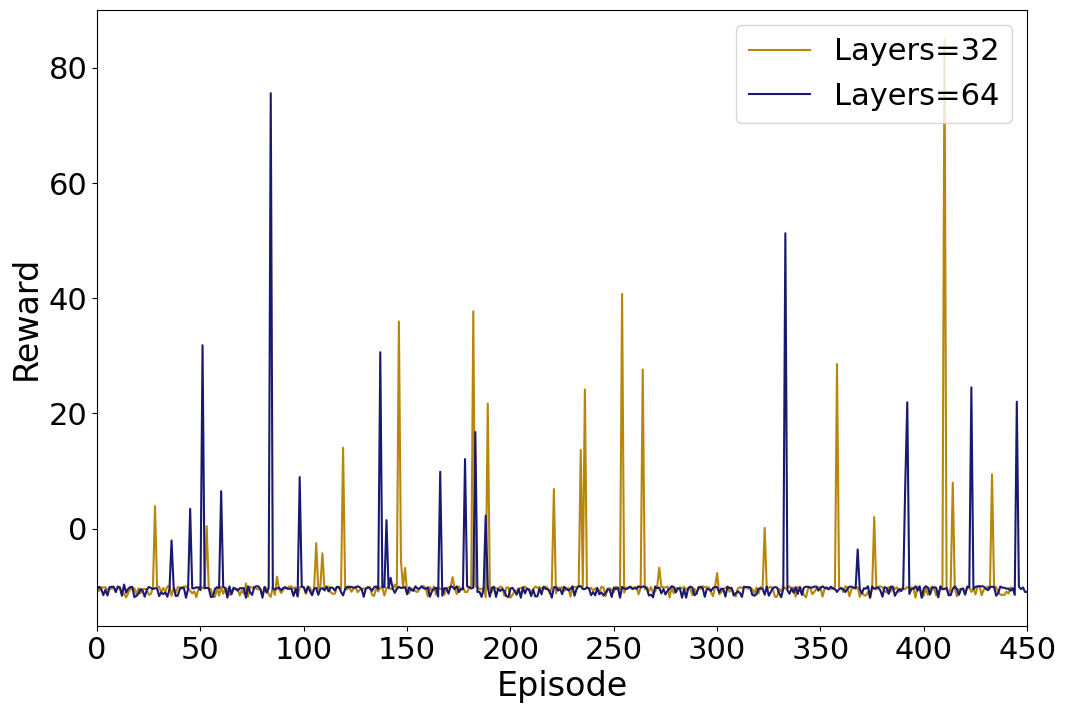

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(df4['episode_reward'], label='Layers=32', color='darkgoldenrod', alpha=1.0)
plt.plot(df_layers64['episode_reward'], label='Layers=64', color='midnightblue', alpha=1.0)

plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
# plt.axhline(y=900, color='black', linestyle='--', lw=2)
# plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 450)

plt.show()

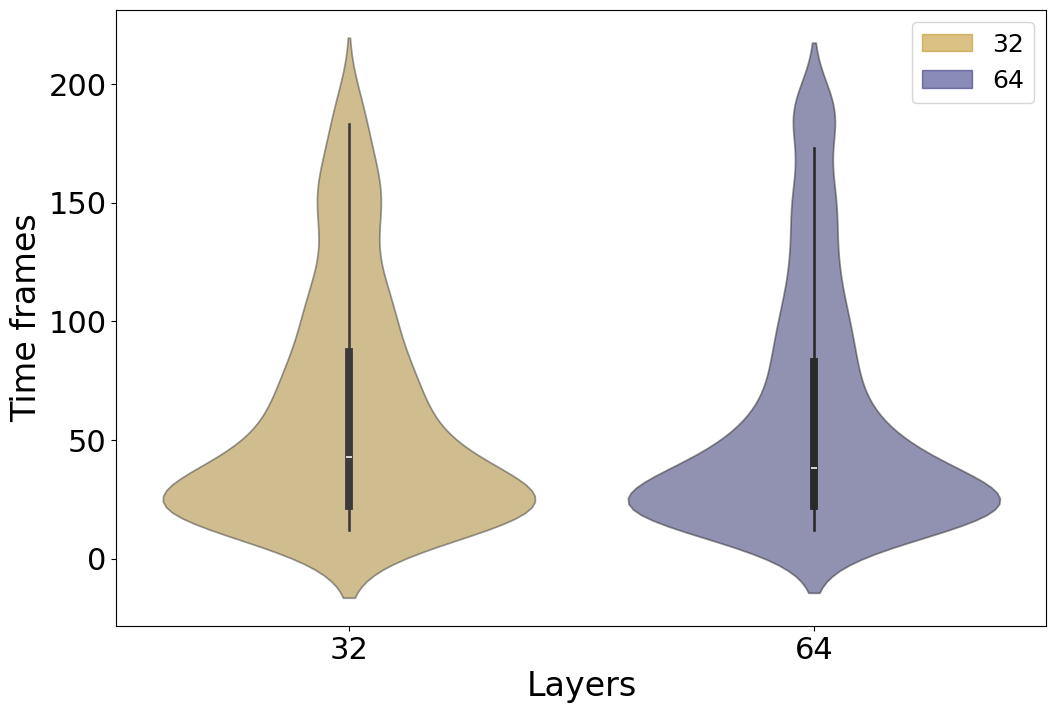

In [37]:
dataframes = [df4, df_layers64]
colors = ['darkgoldenrod', 'midnightblue']
positions = np.arange(len(dataframes))
labels = ['32', '64']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Layers', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
# plt.ylim(-200, 1000)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

In [36]:
df_layers64.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.257327,58.973684,-8.852217,-9.055620,1.099429
std,0.256346,49.670183,8.997989,1.081772,0.061313
min,0.022270,12.000000,-12.000000,-10.813733,0.867079
25%,0.057649,22.000000,-10.835443,-9.902090,1.064703
50%,0.149232,38.000000,-10.384204,-9.190016,1.097730
75%,0.386305,83.000000,-10.146253,-8.686356,1.134299
max,1.000000,191.000000,85.189922,-6.675282,1.437928
